In [1]:
# Strip the header of raw files

from google.colab import files
import os
from datetime import datetime
from google.colab import drive
import shutil

def strip_header(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    modified_lines = lines[1:]  # Exclude the first line

    modified_content = ''.join(modified_lines)
    modified_file_path = os.path.splitext(file_path)[0] + '_stripped.txt'

    with open(modified_file_path, 'w') as modified_file:
        modified_file.write(modified_content)

    print(f'Stripped header and saved the modified file as: {modified_file_path}')

# Upload multiple files
uploaded_files = files.upload()

for file_name, file_content in uploaded_files.items():
    # Save the uploaded file
    with open(file_name, 'wb') as file:
        file.write(file_content)

    # Strip the header from the uploaded file
    strip_header(file_name)

    # Move the modified file to the specified Google Drive folder
    drive.mount('/content/drive')

    # Create a new folder with the current date in "My Drive/Colab Notebooks"
    base_folder = '/content/drive/My Drive/Colab Notebooks'
    current_date = datetime.now().strftime('%Y-%m-%d')
    folder_path = os.path.join(base_folder, current_date)
    os.makedirs(folder_path, exist_ok=True)

    # Move the modified file to the created folder
    modified_file_path = os.path.splitext(file_name)[0] + '_stripped.txt'
    new_file_path = os.path.join(folder_path, os.path.basename(modified_file_path))
    shutil.move(modified_file_path, new_file_path)

    print(f'Moved the modified file to: {new_file_path}')

Saving 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV.txt to 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV.txt
Stripped header and saved the modified file as: 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped.txt
Mounted at /content/drive
Moved the modified file to: /content/drive/My Drive/Colab Notebooks/2023-05-27/230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped.txt


In [55]:
from google.colab import files
import os
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime('%Y-%m-%d')

# Create the output folder path
base_folder = '/content/drive/My Drive/Colab Notebooks'
folder_path = os.path.join(base_folder, current_date)
os.makedirs(folder_path, exist_ok=True)

# Upload the text file
uploaded = files.upload()

# Get the fill-in values from the user
reference_potential = float(input("Enter the reference potential (V): "))
resistance = float(input("Enter the resistance (Ω): "))
geometric_area = float(input("Enter the geometric area (cm²): "))

# Process the data
file_name = next(iter(uploaded))
file_path = os.path.join(folder_path, file_name)

processed_lines = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line:
            potential, current = line.strip().split('\t')
            new_current = float(current) / geometric_area
            new_potential = float(potential) - (float(current) / 1000 * resistance) + reference_potential
            processed_line = '{}\t{}\n'.format(new_potential, new_current)
            processed_lines.append(processed_line)

# Save the processed data to a new file with suffix '_iR-corrected.txt'
output_file_name = os.path.splitext(file_name)[0] + '_iR-corrected.txt'
output_file_path = os.path.join(folder_path, output_file_name)

with open(output_file_path, 'w') as output_file:
    output_file.writelines(processed_lines)

print('Data processing completed. Processed file saved as:', output_file_path)

Saving 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped.txt to 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped (36).txt
Enter the reference potential (V): 0.72
Enter the resistance (Ω): 3.44
Enter the geometric area (cm²): 1
Data processing completed. Processed file saved as: /content/drive/My Drive/Colab Notebooks/2023-05-27/230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped_iR-corrected.txt


Saving 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped.txt to 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped (38).txt
Saving 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped_iR-corrected.txt to 230510_Ni-NiMo_SCE_NaCl_MgSO4_RT_02_CV_stripped_iR-corrected (1).txt


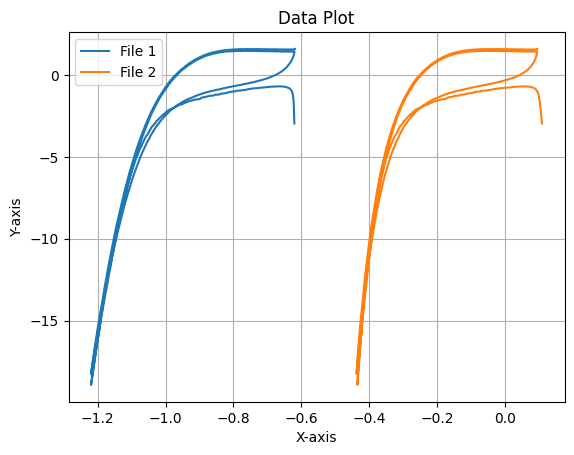

In [57]:
from google.colab import files
import matplotlib.pyplot as plt

# Upload the text files
uploaded_files = files.upload()

# Initialize lists to store x and y values from multiple files
x_values = []
y_values = []

# Process each uploaded file
for file_name in uploaded_files.keys():
    # Read data from the text file
    current_x_values = []
    current_y_values = []

    with open(file_name, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line:
                x, y = line.strip().split('\t')
                current_x_values.append(float(x))
                current_y_values.append(float(y))

    # Store x and y values for the current file
    x_values.append(current_x_values)
    y_values.append(current_y_values)

# Create the plot with multiple lines
for i in range(len(x_values)):
    plt.plot(x_values[i], y_values[i], label=f'File {i+1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Plot')
plt.grid(True)
plt.legend()
plt.show()